In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(1234)
random.seed(1234)
import warnings

warnings.filterwarnings("ignore")

# Data の読み込み
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
submission = pd.read_csv("data/gender_submission.csv")

In [2]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Data の概要を把握する

In [5]:
# Data の型を確認する
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# train.csv の数値Data の概要を確認
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# test.csv の数値Data の概要を確認
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# 各Category変数の確認
df_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

男性が女性の２倍ほど多い。

In [9]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Southampton から乗船した客がもっとも多い。

In [10]:
df_train["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Space区切りで複数の部屋番号が記載されている。分析に使用する場合、注意が必要そう。

In [11]:
# 各変数の欠損値の角煮
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Train-data, Test-data ともに
- Age
- Cabin
について欠損値が多く含まれている。


## Data を可視化する

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### Survived に関する Data を可視化する
目的変数である「Survived」に関する Data を可視化。

#### Embarked と Survived の関係を確認していく

In [14]:
df_train[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [15]:
# 可視化したい Data から欠損値を除外（※とり急ぎ概要把握の為）
df_train[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [16]:
# Embarked と Survived の値で集計
df_train[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [17]:
# 可視化しやるいように Data を横持に変換
df_embarked = df_train[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()
df_embarked

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<AxesSubplot: xlabel='Embarked'>

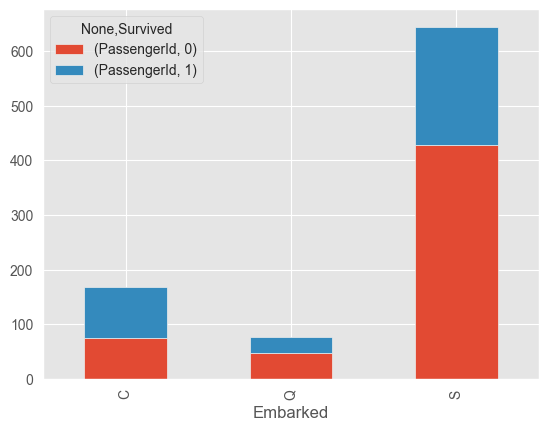

In [18]:
# 積み上げ縦棒 Graph で可視化
df_embarked.plot.bar(stacked=True)

乗船港が
- Cherbourg は生死が半々
- Queenstown は半数以上が死亡
- Southampton は半数以上が死亡

もしかしたら、乗船港によって、乗客の Type や状態に何か違いがあるかもしれない。

In [19]:
df_embarked

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

In [20]:
# 死亡率の列を作成し確認
df_embarked["survived_rate"] = df_embarked.iloc[:, 0] / (df_embarked.iloc[:, 0] + df_embarked.iloc[:, 1])
df_embarked

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

#### Sex と Survived の関係について確認

<AxesSubplot: xlabel='Sex'>

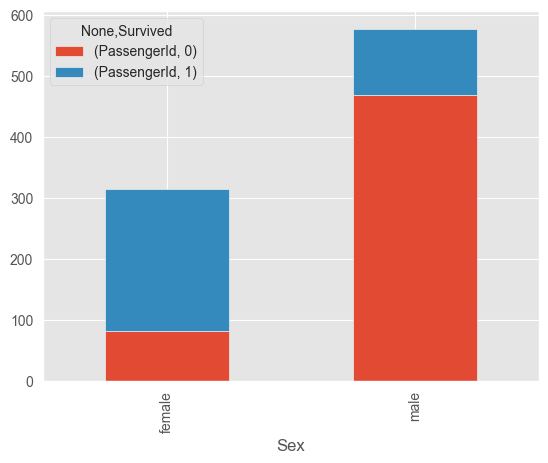

In [21]:
df_sex = df_train[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
df_sex.plot.bar(stacked=True)

女性のほうが男性よりも生存率が高い。

#### Pclass(Ticket) と Survived の関係について確認

<AxesSubplot: xlabel='Pclass'>

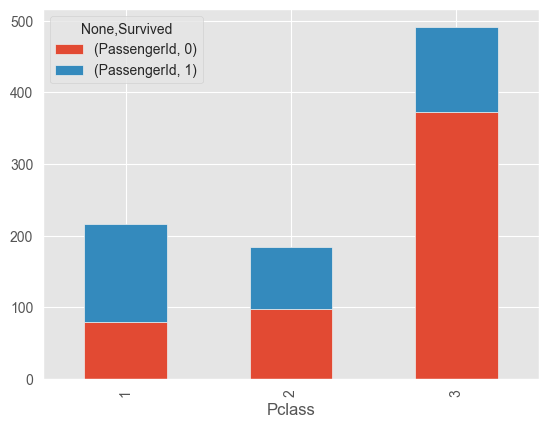

In [22]:
df_ticket = df_train[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
df_ticket.plot.bar(stacked=True)

Ticked の階級が高いほど生存率が高い。
※優先的に救助された？

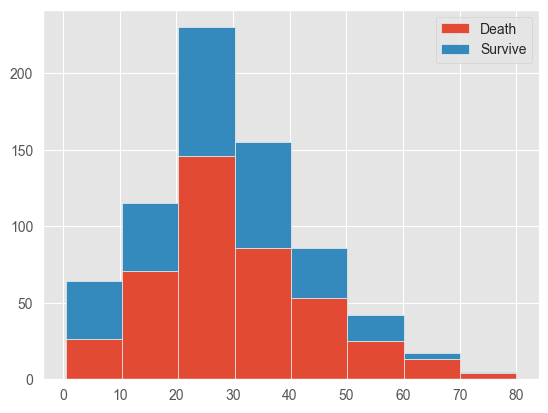

In [23]:
# 年代ごとの生存率を Histogram で可視化する
plt.hist((df_train.loc[df_train["Survived"] == 0, "Age"].values, df_train.loc[df_train["Survived"] == 1, "Age"].values),
         histtype="barstacked", bins=8, label=("Death", "Survive"))
plt.legend()

10歳以下の子供は、他の年齢層と比較して生存率が高い様子。
※優先的に救助された？

In [24]:
# Sex と Embarked を Dummy変数に変換
df_train_corr = pd.get_dummies(df_train, columns=["Sex"], drop_first=True)
df_train_corr = pd.get_dummies(df_train_corr, columns=["Embarked"])
df_train_corr

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,1,0,0


In [25]:
# 相関行列の作成
corr_train = df_train_corr.corr()
corr_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


<AxesSubplot: >

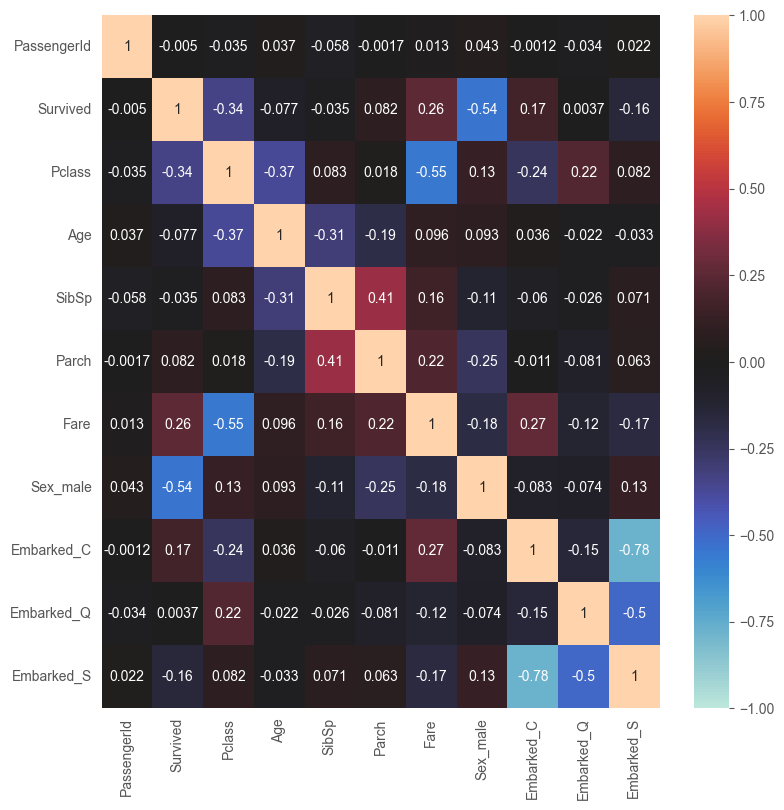

In [26]:
# Heatmap で相関行列を可視化
plt.figure(figsize=(9, 9))
sns.heatmap(corr_train, vmax=1, vmin=-1, center=0, annot=True)

Survived と
- Sex_male: 負の相関がもっとも高い。male を 1 としているため、相関関係が - であることから男性の方が生存率が低く、女性の方が生存率が高い傾向。にある。
- P_class: Ticket の階級が高い方が生存しやすい様子。
- Fare: 相関が 0.26 と生存確率に影響がありそう。
- Age について相関がない様子だが、10歳以下はそれ以外の年代と比較して生存率が高い傾向にあった場合でも、全体として年齢が上がるにつれて生存率が低くなるわけではない場合、相関が低くなるので関係ない、とまでは言えない。

## 前処理・特徴量の生成を行なう
- Fare
- Name
- Parch

に注目していく。

In [27]:
# Train-data と Test-data を統合する（全体の集計や統計情報をとる。）
df_all = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
# 全体Data で欠損値の数を確認
df_all.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Fare に欠損した Data が１つあるので穴埋めする。
補完方法: Pclass ごとの平均を出して、欠損している Data の Pclass に応じた平均値で補完。

In [29]:
# Pclass毎の Fare の平均値を計算
mean_fare = df_all[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()
mean_fare.columns = ["Pclass", "Fare_mean"]
mean_fare

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [30]:
# 欠損値を置換する
df_all = pd.merge(df_all, mean_fare, on="Pclass", how="left")
df_all.loc[(df_all["Fare"].isna()), "Fare"] = df_all["Fare_mean"]
df_all = df_all.drop("Fare_mean", axis=1)

In [31]:
df_all.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

Fare の欠損値が無くなっていることを確認。

In [32]:
# Name の欠損値を調べる
df_all["Name"].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

「苗字」、「敬称」、「名前」の構成になっている。

「敬称」は一般的に年齢や性別に関係があるため、敬称を変数として抽出し追加する。

In [33]:
# 敬称を変数として追加
df_name = df_all["Name"].str.split("[,.]", 2, expand=True)
df_name.columns = ["family_name", "honorific", "name"]
df_name["family_name"] = df_name["family_name"].str.strip()
df_name["honorific"] = df_name["honorific"].str.strip()
df_name["name"] = df_name["name"].str.strip()
df_name

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [34]:
# 各敬称ごとの人数を Count する
df_name["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

In [35]:
# 敬称ごとの年齢分布を確認する
df_all = pd.concat([df_all, df_name], axis=1)
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<AxesSubplot: xlabel='honorific', ylabel='Age'>

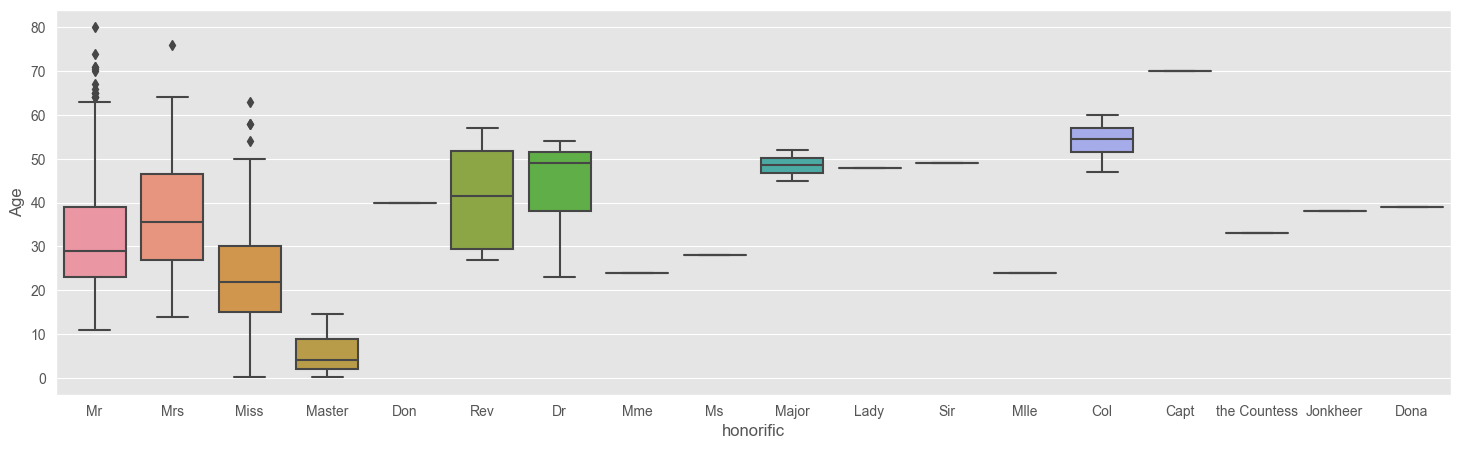

In [36]:
# 敬称ごとの年齢の分布を箱ひげ図で可視化
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=df_all)

In [37]:
# 敬称ごとの年齢の平均を確認
df_all[["Age", "honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


敬称によって生存率に違いがあるか確認していく。

In [38]:
# もとの DataFrame に名前の DataFrame を結合
df_train = pd.concat([df_train, df_name[0:len(df_train)].reset_index(drop=True)], axis=1)
df_test = pd.concat([df_test, df_name[len(df_train):].reset_index(drop=True)], axis=1)

<AxesSubplot: xlabel='honorific'>

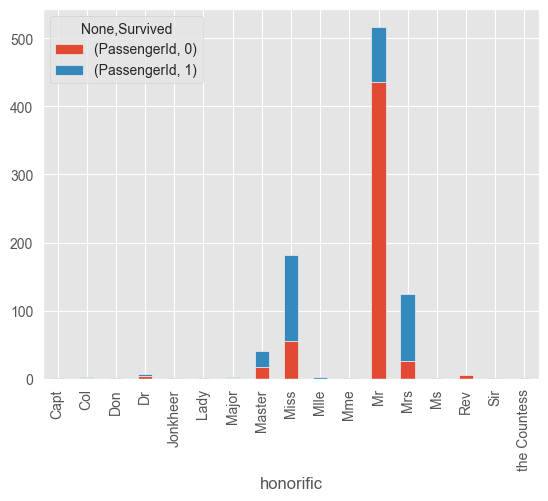

In [39]:
# honorificごとに Survived の値ごとの人数を集計
df_honorific = df_train[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
df_honorific.plot.bar(stacked = True)

- 女性に使用される"Miss", "Mrs" は生存率が高い。
- 男性に使用される"Mr" は死亡率が高い。
- 若い男性に使用される"Master"は、"Mr"に比べて生存率が高い。

上記は、年齢・性別ごとの生存率と同様の傾向となるため、欠損値の多い年齢について敬称ごとの平均年齢で補完する。

In [40]:
# Honorific ごとの平均年齢で年齢が欠損している Data を穴埋めする
mean_honorific_age = df_all[["honorific", "Age"]].groupby("honorific", as_index=False).mean()
mean_honorific_age.columns = ["honorific", "honorific_Age"]
mean_honorific_age

,honorific,honorific_Age
0,Capt,70.000000
1,Col,54.000000
2,Don,40.000000
3,Dona,39.000000
4,Dr,43.571429
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,5.482642
9,Miss,21.774238


In [41]:
df_all = pd.merge(df_all, mean_honorific_age, on="honorific", how="left")
df_all.loc[df_all["Age"].isna(), "Age"] = df_all["honorific_Age"]
df_all = df_all.drop(["honorific_Age"], axis=1)
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


In [42]:
df_all.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
family_name       0
honorific         0
name              0
dtype: int64

家族人数を追加する

In [43]:
# 家族に関する変数を足して家族人数とする
df_all["family_num"] = df_all["Parch"] + df_all["SibSp"]
df_all["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

同船している家族人数が０人（=１人での乗船）が半数以上を占めている。
遭難のような事態において、家族は一緒に行動している可能性があり、１人か同船家族がいるかで生存に影響する可能性があると考え、 alone という変数を作成し追加する。

**alone**: 1:  =1人, 0: ≠1人

In [44]:
df_all.loc[df_all["family_num"] == 0, "alone"] = 1
df_all["alone"].fillna(0, inplace=True)
df_all["alone"].value_counts()

1.0    790
0.0    519
Name: alone, dtype: int64

In [45]:
df_all.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
family_name       0
honorific         0
name              0
family_num        0
alone             0
dtype: int64

#### 予測に不要な変数を削除
- PassengedID: 乗客ID のため予測に不要。
- Name: family_name, honorific, name に分割した為、元Data は不要。
- family_name: Data に対して家族数が多く、１人での乗客も多いため、家族単位の分析は困難な為、不要。
- Ticket: 生存に対する規則性を見出すことが困難な為、不要。
- Cabin: 欠損が多いため削除。

In [46]:
df_all = df_all.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis=1)
df_all.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


Categorical変数のうち文字列のものは数値に変換していく。

In [47]:
categories = df_all.columns[df_all.dtypes == "object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


honorific は
- Mr
- Miss
- Mrs
- Master

以外は数が少ないため、それ以外の honorific は "other" としてまとめる。

In [48]:
df_all.loc[
    ~((df_all["honorific"] == "Mr") |
      (df_all["honorific"] == "Miss") |
      (df_all["honorific"] == "Mrs") |
      (df_all["honorific"] == "Master")), "honorific"] = "other"
df_all["honorific"].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

honorific を Label Encoding で数値化する

In [49]:
df_all.isna().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        2
honorific       0
family_num      0
alone           0
dtype: int64

In [50]:
# Label Encoding は欠損値があると動かないため、Embarked を処理
df_all["Embarked"].fillna("missing", inplace=True)

In [51]:
df_all.isna().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
honorific       0
family_num      0
alone           0
dtype: int64

In [52]:
df_all["Embarked"].value_counts()

S          914
C          270
Q          123
missing      2
Name: Embarked, dtype: int64

In [53]:
df_all.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(df_all["Sex"])
df_all["Sex"] = le.transform(df_all["Sex"])

In [55]:
df_all["Sex"].value_counts()

1    843
0    466
Name: Sex, dtype: int64

In [56]:
for category in categories:
    le = LabelEncoder()
    print(category)
    if df_all[category].dtypes == "object":
        le = le.fit(df_all[category])
        df_all[category] = le.transform(df_all[category])

Sex
Embarked
honorific


In [57]:
df_all.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


df_all を Train-data と Test-data に戻す

In [58]:
train_X = df_all[~df_all["Survived"].isna()].drop("Survived", axis=1).reset_index(drop=True)
train_Y = df_train["Survived"]

test_X = df_all[df_all["Survived"].isna()].drop("Survived", axis=1).reset_index(drop=True)

## Modeling
LightGBN という決定木系の機械学習手法を用いて予測していく。

In [59]:
import lightgbm as lgb

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [61]:
# Training-data の20％を検証Data に分割する
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)

In [62]:
# Category変数を指定して LightGBM 用の Dataset を作成
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [63]:
# Hyper-parameter の設定
lgbm_params = {
    "objective": "binary",
    "random_seed": 1234
}

In [64]:
# 機械学習Model の学習
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [65]:
# 各変数の重要度の確認
model_lgb.feature_importance()

array([ 34,  19, 184,  20,   8, 241,  27,   3,  19,   0])

<AxesSubplot: >

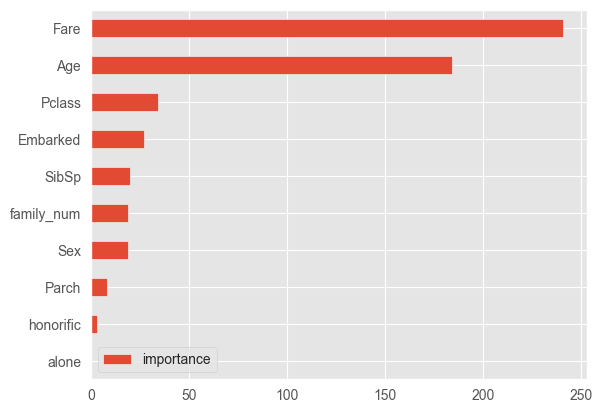

In [66]:
# もとの Data の Column名を表示
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance", ascending=True)
importance.plot.barh()

- 小さい子供
- 上客（Pclass, Fare が高い乗船客）

が優先的に救助された可能性が考えられる。

### 検証Data で予測精度を確認

In [67]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

上記、精度を基準として Tuning していく。

In [69]:
# Hyper Parameter の値の変更
lgbm_params = {
    "objective": "binary",
    "max_bin": 331,
    "num_leaves": 20,
    "min_data_in_leaf": 57,
    "andom_seed": 1234
}

In [70]:
# 再度 LightGBM の Dataset を指定し、学習を実行
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [71]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [72]:
# 検証Data に対する予測値を算出
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [73]:
# 精度の計算
accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

#### Cross Validation による学習
３分割で Cross Validation による学習を行なう

In [74]:
folds = 3

kf = KFold(n_splits=folds)

In [75]:
# Cross Validation による学習
models = []

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_eval,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10, )
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    print(accuracy_score(y_valid, np.round(y_pred)))

    models.append(model_lgb)

[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [76]:
# Test-data の結果を予測して格納
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [77]:
# 予測結果の平均をとる
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [78]:
# 0 か 1 に変換
# このままでは予測生存確率になるため
preds_int = (preds_mean > 0.5).astype(int)

In [79]:
submission["Survived"] = preds_int
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [80]:
# CSV File として書き出す
submission.to_csv("./submit/titanic_submit01.csv", index=False)